In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#!pip install netCDF4
from netCDF4 import Dataset as NetCDFFile
import random
import timeit
import pickle
from scipy import stats
import xarray as xr
import pandas as pd
import statistics
from scipy import interpolate
import os
import pytz, datetime
import multiprocessing as mp
import geopandas
#!pip install descartes
import descartes
from datetime import date

from datetime import datetime

now = datetime.now()

current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

import geopandas
from importlib import reload

# from google.colab import drive
# drive.mount('/content/drive')

Current Time = 04/05/24:20:46:43


In [2]:
!pwd

/Users/kaichiht/Library/CloudStorage/GoogleDrive-kuiper2000@gmail.com/My Drive/Colab/2021_research/tornado_data/Manuscript/seasonal_tornado_forecast_Github


In [2]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)


# load maps
import sys
#del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1995, end_year = 2017,colab=False)
states, costal_lat, costal_lon           = data._maps()
lon, lat                                 = data._lat_lon(sst=True)

# load tornado data
tornado_month                            = data._tornado()

# load observed sst data
sst, sst_anomaly                         = data._data_sst()
sst_obs_dim                              = np.shape(sst)

# load land sea mask
land_sea_mask                            = data._data_landsea_mask(mask_type=[False,True,False])

# load observed sst data
sst_model, sst_ens                       = data._data_sst(obs=False)
sst_model_dim                            = np.shape(sst_model)

Current Time = 04/05/24:20:46:45
working on SST data
type 1 = sst, type 2 = tornado, type 3 = atmosphere, input example = [True,False,False]
working on SST data
01
02
03
04
05
06
07
08
09
10
11
12
return ensemble mean sst
dim = (init_month,step(month),lat,lon)


In [3]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# calculate NINO34 index
from domain_calculation import domain_calculation
domain_calculation                       = domain_calculation(sst_anomaly,lat,lon,[-5,5,190,240])
NINO34_obs                               = domain_calculation._domain_average()
NINO34_obs                               = np.reshape(NINO34_obs,[np.size(NINO34_obs),1])
NINO34_obs                               = (NINO34_obs-np.mean(NINO34_obs))/np.std(NINO34_obs)


from domain_calculation import domain_calculation
# NINO34 has dimensions of initialization month, year, and target month. 
# for example NINO34[0,:,0]  = Jan initialization forecast all Jan
# for example NINO34[11,:,0] = Dec initialization forecast the next Jan
sst_model                                = np.reshape(sst_model,[sst_model_dim[0]*sst_model_dim[1],sst_model_dim[2],sst_model_dim[3]])
domain_calculation                       = domain_calculation(sst_model,lat,lon,[-5,5,190,240])
NINO34                                   = domain_calculation._domain_average()
NINO34                                   = np.reshape(NINO34,[sst_model_dim[0],sst_model_dim[1]])
NINO34                                   = np.reshape(NINO34,[12,23,12])

Current Time = 04/05/24:20:47:29


In [4]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# calculate ENSO regression maps
from Regression_wise import Regression_wise
Regression_wise                          = Regression_wise(NINO34_obs,sst_anomaly,0,0)
coef                                     = Regression_wise._linear_regression()

Current Time = 04/05/24:20:47:30
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
(1, 276)
(360, 576, 276)


In [5]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)


# calculate ENSO scores
#import sys
#del sys.modules["Prediction_wise"]

from Prediction_wise import Prediction_wise

Prediction_wise  = Prediction_wise(NINO34_obs, NINO34, obs_init='1995-01', obs_final='2018-1', obs_interval='1m', model_init='1995-01', model_final='2019-12', model_init_freq='12m',total_forecast_lead=12)
score            = Prediction_wise._prediction_eval()


Current Time = 04/05/24:20:47:30


In [6]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# strat from here
from Regression_wise import Regression_wise
NINO34_obs                               = np.reshape(NINO34_obs,[23,12])
Regression_wise                          = Regression_wise(NINO34_obs[:,2:3],tornado_month[3:26],0,0) # using march SST regress against tornado
PPH_NINO34                               = Regression_wise._linear_regression()


#import sys
#del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
Regression_wise                          = Regression_wise(tornado_month[3:26],NINO34_obs[:,2:3],0,0)
reg_coef                                 = Regression_wise._corrcoef()


Current Time = 04/05/24:20:47:30
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
(1, 23)
(23, 61, 23)
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression


/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-package

# FIG1

Current Time = 04/05/24:20:47:30
Today's date: 2024-04-05


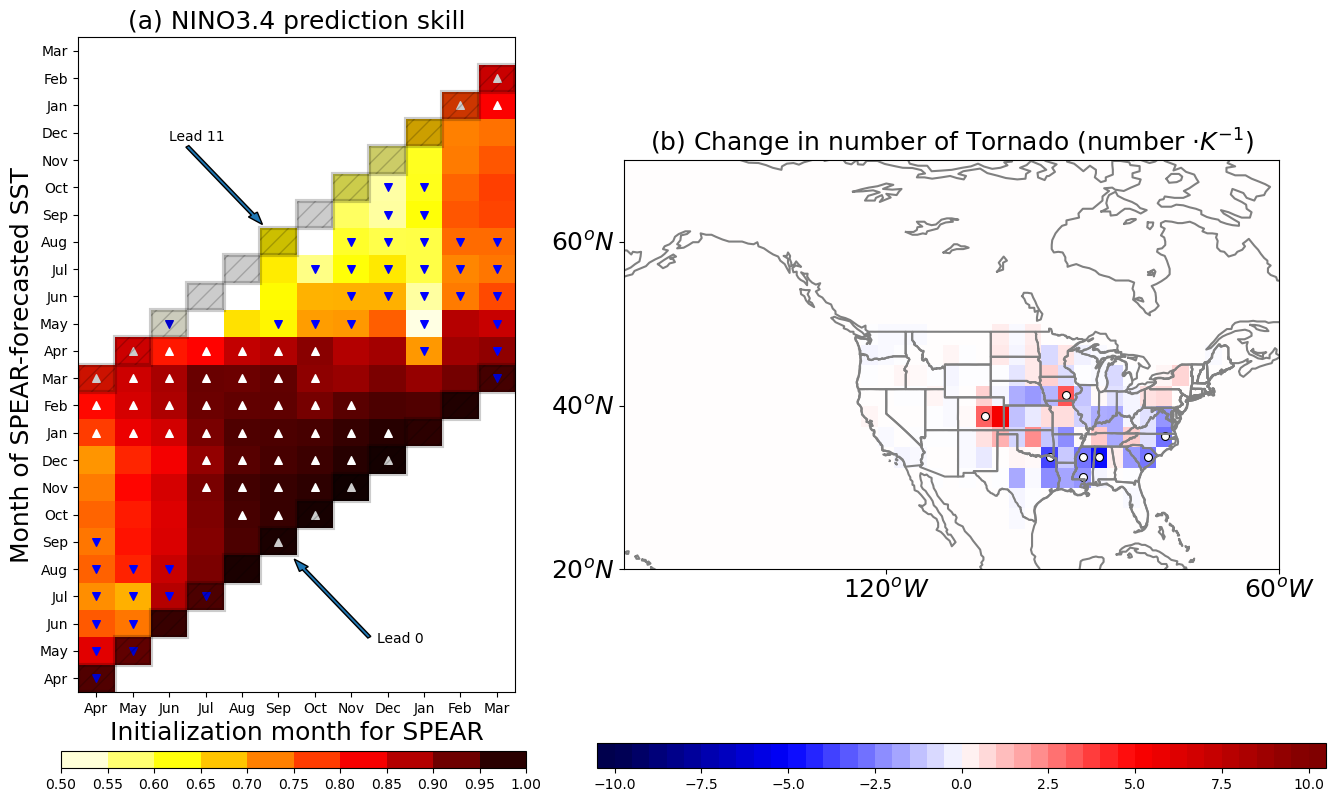

In [7]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

#lon, lat                                 = data._lat_lon(tornado=True)
import sys
del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1995, end_year = 2017, colab=False)
lon, lat                                 = data._lat_lon(tornado=True)

import sys
#del sys.modules["Tile_plot"]
from Tile_plot import making_tile
making_tile                              = making_tile(score)
score_map_NINO34, score_map_NINO34_upper, score_map_NINO34_lower,score_map_anomaly_NINO34,target_month_map = making_tile._tile_plot()


# plot Figure 1
today = date.today()
print("Today's date:", today)



my_map   = 'hot_r'
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 3]})
cs1      = axs[0].pcolormesh(score_map_NINO34,vmin=0.505,vmax=1,cmap=my_map)
axs[0].set_xticks(np.arange(0.5,13,1), minor=False)
axs[0].set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov',\
                                'Dec','Jan','Feb','Mar','Apr'], fontdict=None, minor=False)
axs[0].set_yticks(np.arange(0.5,24,1), minor=False)
axs[0].set_yticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov',\
                                'Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov','Dec','Jan','Feb','Mar'], fontdict=None, minor=False)
axs[0].set_ylim([0,24])
axs[0].set_xlabel('Initialization month for SPEAR',fontsize=18)
axs[0].set_ylabel('Month of SPEAR-forecasted SST',fontsize=18)

posi_x, posi_y = np.where((score_map_NINO34.T>score_map_NINO34_upper.T) & (score_map_NINO34.T>0.505))
axs[0].scatter(posi_x+0.5,posi_y+0.5,30,'w','^')
axs[0].scatter(posi_x+0.5,posi_y+0.5,8,'w','^')

posi_x, posi_y = np.where((score_map_NINO34.T<score_map_NINO34_lower.T) & (score_map_NINO34.T>0.505))
axs[0].scatter(posi_x+0.5,posi_y+0.5,30,'b','v')
axs[0].scatter(posi_x+0.5,posi_y+0.5,8,'b','v')

for j in range(12):
    x1 = [j,j+1,j+1,j]
    y1 = [j,j,j+1,j+1]
    axs[0].fill(y1,x1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
axs[0].arrow(8, 2, -1.8, 2.5, width = 0.1)
axs[0].text(8.2, 1.8, 'Lead 0')
for j in range(12):
    x1 = [j+11,j+1+11,j+1+11,j+11]
    y1 = [j,j,j+1,j+1]
    axs[0].fill(y1,x1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
axs[0].arrow(3, 18+2, 1.8, -2.5, width = 0.1)
axs[0].text(2.5, 18.2+2, 'Lead 11')
axs[0].set_title('(a) NINO3.4 prediction skill',fontsize=18)





states.boundary.plot(color='gray',ax=axs[1])
cs2     = axs[1].pcolor(lon-360,lat+1.25,PPH_NINO34*land_sea_mask,vmin=-10,vmax=10,cmap='seismic')
posi_x, posi_y = np.where((reg_coef*land_sea_mask>=0.3) & (np.abs(PPH_NINO34)>1.5))
axs[1].scatter(lon[posi_x,posi_y]-360,lat[posi_x,posi_y]+1.25,30,'k','o')
axs[1].scatter(lon[posi_x,posi_y]-360,lat[posi_x,posi_y]+1.25,15,'w','o')

posi_x, posi_y = np.where((reg_coef*land_sea_mask<=-0.3) & (np.abs(PPH_NINO34)>1.5))
axs[1].scatter(lon[posi_x,posi_y]-360,lat[posi_x,posi_y]+1.25,30,'k','o')
axs[1].scatter(lon[posi_x,posi_y]-360,lat[posi_x,posi_y]+1.25,15,'w','o')

axs[1].set_title(r'(b) Change in number of Tornado (number $\cdot K^{-1}$)',fontsize=18)
axs[1].plot(costal_lon-360,costal_lat,'gray')
axs[1].set_xticks([0-360, 60-360, 120-360, 180-360,240-360,300-360,360-360], minor=False)
axs[1].set_xticklabels(['$0^oE$', '$60^oE$','$120^oE$', '$180^oE$', '$120^oW$', '$60^oW$', '$0^oW$'], fontdict=None, minor=False,fontsize=18)
axs[1].set_yticks([-80,-60,-40,-20,0, 20,40,60,80], minor=False)
axs[1].set_yticklabels(['$80^oS$', '$60^oS$', '$40^oS$', '$20^oS$', '$Eq$', '$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'], fontdict=None, minor=False,fontsize=18)
axs[1].set_xlim([200-360,300-360])
axs[1].set_ylim([20,70])


fig.set_size_inches(15.5,8.5)
cbar_ax = fig.add_axes([0.114, 0.02, 0.3,0.02])
cbar    = fig.colorbar(cs1, cax=cbar_ax, orientation='horizontal',boundaries=np.arange(0.5,1.05,0.05), ticks=np.arange(0.5,1.05,0.05))

cbar_ax = fig.add_axes([0.46, 0.02, 0.47,0.03])
cbar    = fig.colorbar(cs2, cax=cbar_ax, orientation='horizontal',boundaries=np.arange(-10.5,11,0.5))


# FIG2 starts from here

In [8]:
# reload SST data
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# load maps
import sys
del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1992, end_year = 2021,colab=False)
states, costal_lat, costal_lon           = data._maps()
lon, lat                                 = data._lat_lon(sst=True)

# load tornado data
tornado_month                            = data._tornado()

# load land sea mask
land_sea_mask                            = data._data_landsea_mask(mask_type=[False,True,False])

# load observed sst data
sst_model,sst_ens                        = data._data_sst(obs=False)
sst_model_dim                            = np.shape(sst_model)
del sst_ens

Current Time = 04/05/24:20:40:33
type 1 = sst, type 2 = tornado, type 3 = atmosphere, input example = [True,False,False]
working on SST data
01
02
03
04
05
06
07
08
09
10
11
12
return ensemble mean sst
dim = (init_month,step(month),lat,lon)


In [271]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)


from domain_calculation import domain_calculation
# using NINO34 along
sst_model                                = np.reshape(sst_model,[sst_model_dim[0]*sst_model_dim[1],sst_model_dim[2],sst_model_dim[3]])
domain_calculation                       = domain_calculation(sst_model,lat,lon,[-5,5,190,240])
NINO34                                   = domain_calculation._domain_average()
NINO34                                   = np.reshape(NINO34,[sst_model_dim[0],sst_model_dim[1]])
NINO34                                   = np.reshape(NINO34,[12,30,12])
sst_model                                = np.reshape(sst_model,sst_model_dim)
NINO34                                   = (np.reshape(NINO34,[12,30,12])-np.mean(NINO34))/np.std(NINO34)


# using SST mode
data             = np.load('../../SST_EOFs_1995_2017_based.npz')
#data             = np.load('/Users/kaichiht/Library/CloudStorage/GoogleDrive-kuiper2000@gmail.com/My Drive/Colab/2021_research/tornado_data/SST_EOFs_1995_2017_based.npz')
pcs_obs_sst      = data['pcs_obs_sst']
pcs_obs_sst[1,:,:,:,:] = -pcs_obs_sst[1,:,:,:,:]
pcs_obs_sst_ens  = np.reshape(pcs_obs_sst,[20,15,12,30,12])
pcs_obs_sst      = np.reshape(pcs_obs_sst_ens.mean(axis=1),[20,12,360])

pcs_obs_sst      = np.reshape(pcs_obs_sst,[20,12*360])
pcs_obs_sst_ens  = np.reshape(pcs_obs_sst_ens,[20,15*12*30*12])

for mode in range(20):
    pcs_obs_sst[mode,:]     = pcs_obs_sst[mode,:]/np.std(pcs_obs_sst[mode,:])
    pcs_obs_sst_ens[mode,:] = pcs_obs_sst_ens[mode,:]/np.std(pcs_obs_sst_ens[mode,:])

pcs_obs_sst      = np.reshape(pcs_obs_sst,[20,12,360])         # dimension = [mode, init month, year, target month] 
pcs_obs_sst_ens  = np.reshape(pcs_obs_sst_ens,[20,15,12,360])  


Current Time = 04/03/24:20:02:31


In [59]:
np.shape(coef_SSTmode)

(12, 12, 30, 20, 1)

In [274]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)


# CONUS with a single value of tornado activity
tornado_month               = np.reshape(tornado_month,[30,23*61])            # by regions 
tornado_day_CONUS_monthly   = np.reshape(np.sum(tornado_month,axis=1),[30,1]) # CONUS average 
print(np.shape(tornado_day_CONUS_monthly))

import sys
#del sys.modules["Tornado_forecast_model"]
from Tornado_forecast_model import tornado_model
tornado_model               = tornado_model(tornado_data = tornado_day_CONUS_monthly, predictor = np.reshape(NINO34,[1,12,30*12]), init_year = 1992)
predict_NINO34,coef_NINO34,tornado_percentile, tornado_percentile_min   = tornado_model._forecast(normalize=False)

import sys
del sys.modules["Tornado_forecast_model"]
from Tornado_forecast_model import tornado_model
tornado_model                 = tornado_model(tornado_data = tornado_day_CONUS_monthly, predictor = pcs_obs_sst, init_year = 1992)
predict_SSTmode,coef_SSTmode,tornado_percentile, tornado_percentile_min  = tornado_model._forecast(normalize=True)


Current Time = 04/03/24:20:03:23
(30, 1)
working on mode = 1
working on mode = 1
working on mode = 2
working on mode = 3
working on mode = 4
working on mode = 5
working on mode = 6
working on mode = 7
working on mode = 8
working on mode = 9
working on mode = 10
working on mode = 11
working on mode = 12
working on mode = 13
working on mode = 14
working on mode = 15
working on mode = 16
working on mode = 17
working on mode = 18
working on mode = 19
working on mode = 20


In [286]:

n    = len(tornado_day_CONUS_monthly)
sort = sorted(tornado_day_CONUS_monthly)
# back to actual tornado number 
print(sort[int(n * tornado_day_CONUS_quantile[0])])

#print(tornado_day_CONUS_quantile)
#tornado_percentile

[207.]
[0.1        0.06666667 0.03333333 0.2        0.46666667 0.33333333
 0.83333333 0.73333333 0.5        0.26666667 0.36666667 0.86666667
 0.93333333 0.16666667 0.66666667 0.7        0.9        0.4
 0.6        1.         0.56666667 0.43333333 0.13333333 0.8
 0.53333333 0.76666667 0.3        0.96666667 0.23333333 0.63333333]


Current Time = 04/02/24:21:49:18


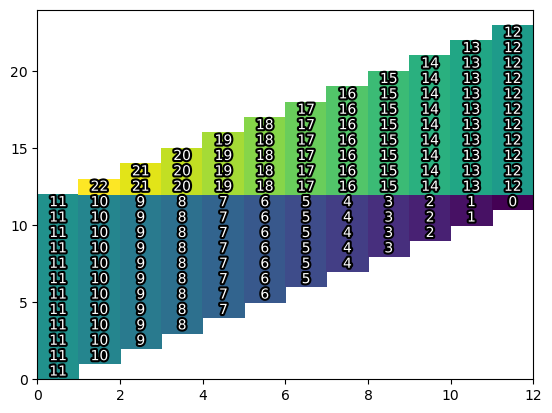

In [60]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# create checker board for the following use
import matplotlib.patheffects as path_effects

#del sys.modules["Tile_plot"]
from Tile_plot import making_tile
lead_time_label = np.ones((14,14))*1000

making_tile                                  = making_tile(lead_time_label)
lead_time_label, lead_time_label_concatenate = making_tile._label()


plt.figure()
plt.pcolor(lead_time_label_concatenate)
for i in range(24):
    for j in range(12):
        #plt.text(i+0.25, j+0.25, str(int(lead_time_label[i,j])), fontsize=12)
        if ~np.isnan(lead_time_label_concatenate[i,j]):
              text = plt.text(j+0.5, i+0.5, str(int(lead_time_label_concatenate[i,j])), color='white',\
                          ha='center', va='center', size=10)
              text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                       path_effects.Normal()])

In [61]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# calculate the deterministic scores
import sys
#del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
tornado_day_CONUS_quantile               = tornado_model._quantile_mapping(tornado_day_CONUS_monthly[:,0])
Regression_wise                          = Regression_wise(np.reshape(tornado_day_CONUS_quantile,[30,1]),np.squeeze(predict_NINO34),0,2)
score_map_NINO34                         = Regression_wise._corrcoef()

del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
Regression_wise                          = Regression_wise(np.reshape(tornado_day_CONUS_quantile,[30,1]),np.squeeze(predict_SSTmode),0,3)
score_map_SSTmode                        = Regression_wise._corrcoef()

# calculate the probabilistic skill score
del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
Regression_wise                                               = Regression_wise(np.reshape(tornado_day_CONUS_quantile,[30,1]),np.squeeze(predict_NINO34),0,2)
RPSS_NINO34,obs_category_NINO34, model_category_NINO34        = Regression_wise._RPSS()

del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
Regression_wise                                               = Regression_wise(np.reshape(tornado_day_CONUS_quantile,[30,1]),np.squeeze(predict_SSTmode),0,3)
RPSS_SSTmode,obs_category_SSTmode, model_category_SSTmode     = Regression_wise._RPSS()


# calculate the attribute diagram
del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
Regression_wise                                               = Regression_wise(np.reshape(tornado_day_CONUS_quantile,[30,1]),np.squeeze(predict_NINO34),0,2)
hit_NINO34,pool_NINO34,scale_NINO34                           = Regression_wise._attribute_diagram(threshold=0.4)

del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
Regression_wise                                               = Regression_wise(np.reshape(tornado_day_CONUS_quantile,[30,1]),np.squeeze(predict_SSTmode[6:12,:,:,:]),0,3)
hit_SSTmode,pool_SSTmode,scale_SSTmode                        = Regression_wise._attribute_diagram(threshold=0.4)

Current Time = 04/02/24:21:49:32
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
abc
abc
1
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
abcd
abcd
1
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
abc
abc
1
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
abcd
abcd
1


Current Time = 04/02/24:22:22:14
nan


/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/4105133620.py:21: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/4105133620.py:51: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/4105133620.py:77: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQua

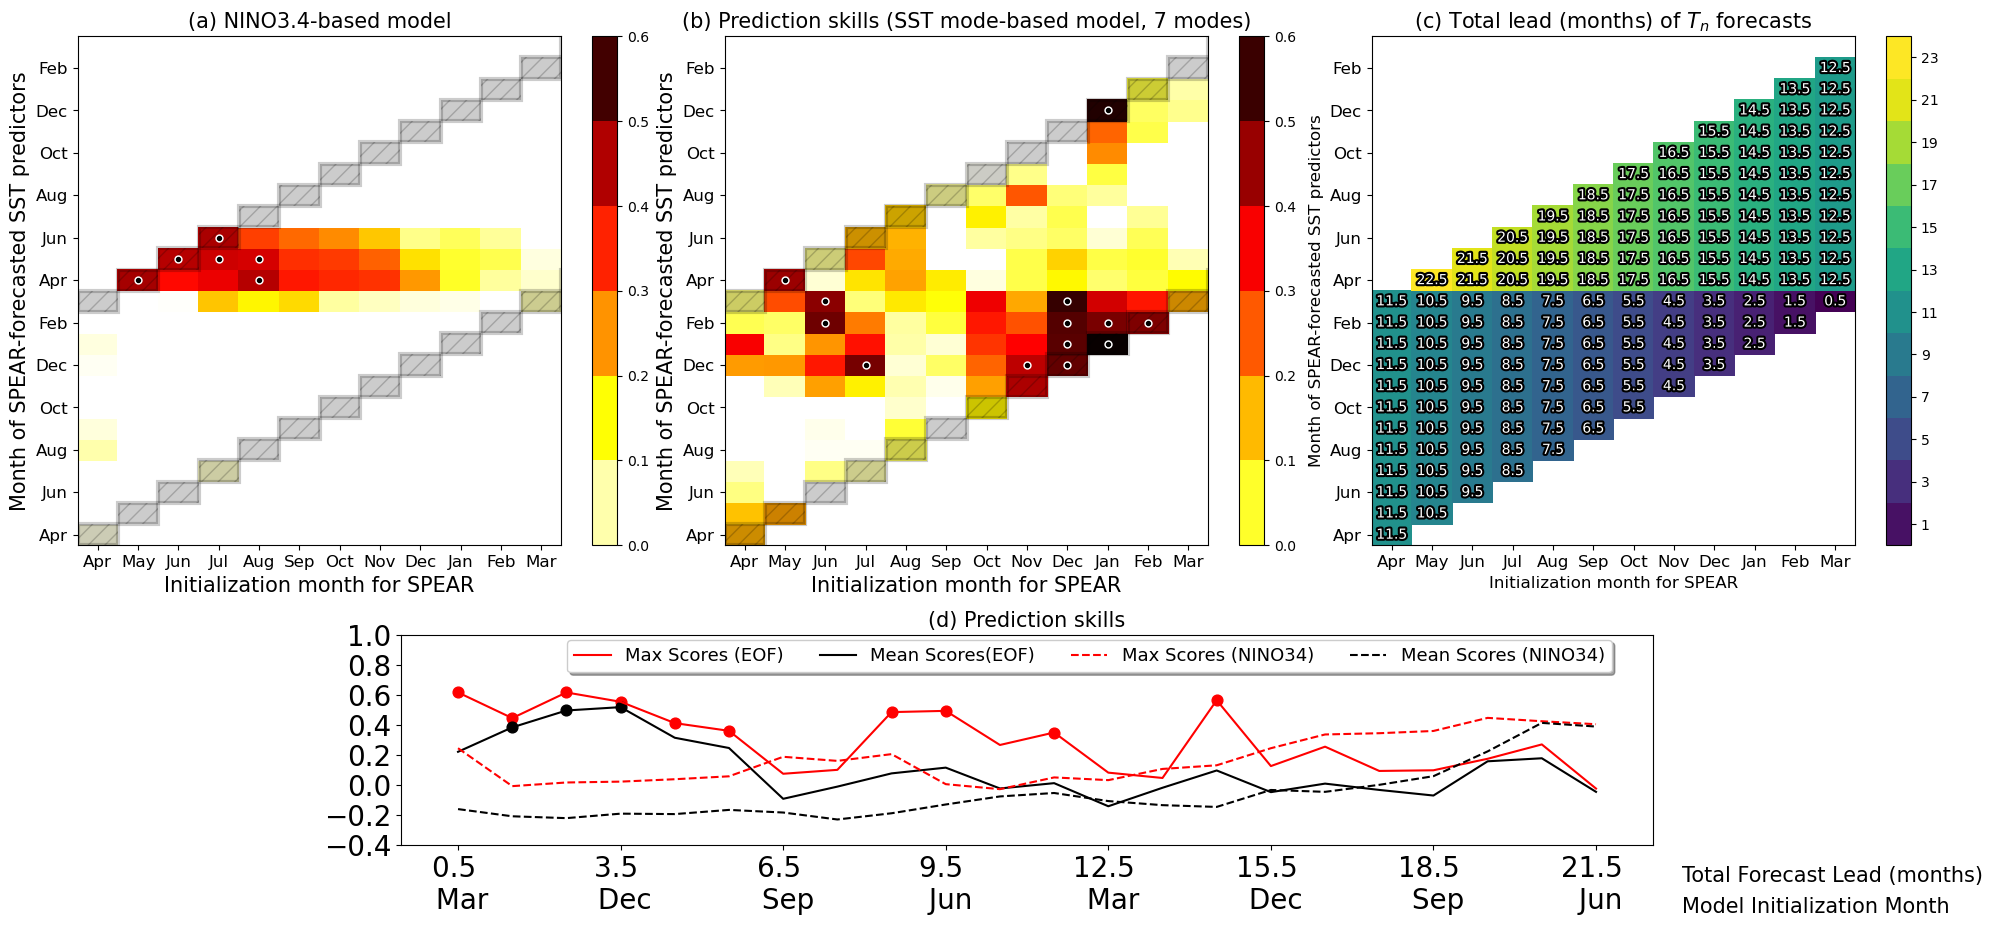

In [79]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

#import sys
del sys.modules["Tile_plot"]
from Tile_plot import making_tile
making_tile                                                                       = making_tile(np.squeeze(score_map_NINO34[:,:]))
score_map_extend, max_score_NINO34, mean_score_NINO34, std_score, init_month      = making_tile._tile_plot_predictor_month(lead_time_label)


grid   = plt.GridSpec(6, 6, wspace=0.15, hspace=1.5)

my_map   = 'hot_r'
fig=plt.figure()
plt.subplot(grid[0:4, 0:2])
cs=plt.pcolor(score_map_extend,cmap=my_map,vmin=0,vmax=0.6)
cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
plt.xticks(np.arange(0.5,17,1),('Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov',\
                        'Dec','Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug'),fontsize=12)
plt.yticks(np.arange(0.5,24,2), ('Apr','Jun','Aug','Oct',\
                        'Dec','Feb','Apr','Jun','Aug','Oct','Dec','Feb'),fontsize=12)
plt.xlim([0,12])
plt.ylim([0,24])
for j in range(0,14):
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1,(j)-1+1,(j)-1+2,(j)-1+2]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1+11,(j)-1+1+11,(j)-1+2+11,(j)-1+2+11]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
plt.xlabel('Initialization month for SPEAR',fontsize=15)
plt.ylabel('Month of SPEAR-forecasted SST predictors',fontsize=15)
plt.title('(a) NINO3.4-based model',fontsize=15)
posi_x,posi_y = np.where(score_map_extend.T>0.4)
plt.scatter(posi_x+0.5,posi_y+0.5,25,'w')
plt.scatter(posi_x+0.5,posi_y+0.5,8,'k')


del sys.modules["Tile_plot"]
from Tile_plot import making_tile
making_tile                                                                        = making_tile(np.squeeze(score_map_SSTmode[8,:,:]))
score_map_extend, max_score_SSTmode, mean_score_SSTmode, std_score, init_month     = making_tile._tile_plot_predictor_month(lead_time_label)

print(np.max(score_map_extend))
plt.subplot(grid[0:4,2:4])
cs=plt.pcolor(score_map_extend,cmap=my_map,vmin=-0.1,vmax=0.6)
cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
plt.xticks(np.arange(0.5,17,1),('Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov',\
                        'Dec','Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug'),fontsize=12)
plt.yticks(np.arange(0.5,24,2), ('Apr','Jun','Aug','Oct',\
                        'Dec','Feb','Apr','Jun','Aug','Oct','Dec','Feb'),fontsize=12)
plt.xlim([0,12])
plt.ylim([0,24])
for j in range(0,14):
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1,(j)-1+1,(j)-1+2,(j)-1+2]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1+11,(j)-1+1+11,(j)-1+2+11,(j)-1+2+11]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
plt.xlabel('Initialization month for SPEAR',fontsize=15)
plt.ylabel('Month of SPEAR-forecasted SST predictors',fontsize=15)
plt.title('(b) Prediction skills (SST mode-based model, 7 modes)',fontsize=15)
posi_x,posi_y = np.where(score_map_extend.T>0.4)
plt.scatter(posi_x+0.5,posi_y+0.5,25,'w')
plt.scatter(posi_x+0.5,posi_y+0.5,8,'k')
plt.xlim([0,12])
plt.ylim([0,24])


plt.subplot(grid[0:4,4:6])
cs   = plt.pcolor(lead_time_label_concatenate)
cbar = plt.colorbar(cs,boundaries=np.arange(0,25,2), ticks=np.arange(1,26,2))
plt.xticks(np.arange(0.5,17,1),('Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov',\
                                'Dec','Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug'),fontsize=12)
plt.yticks(np.arange(0.5,24,2), ('Apr','Jun','Aug','Oct',\
                        'Dec','Feb','Apr','Jun','Aug','Oct','Dec','Feb'),fontsize=12)

for i in range(24):
    for j in range(12):
        if ~np.isnan(lead_time_label_concatenate[i,j]):
              text = plt.text(j+0.5, i+0.5, str(int(lead_time_label_concatenate[i,j])+0.5), color='white',\
                          ha='center', va='center', size=10)
              text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                       path_effects.Normal()])


plt.ylim(0,24)
plt.xlim(0,12)
plt.xlabel('Initialization month for SPEAR',fontsize=12)
plt.ylabel('Month of SPEAR-forecasted SST predictors',fontsize=12)
plt.title(r'(c) Total lead (months) of $T_n$ forecasts',fontsize=15)


ax2 = plt.subplot(grid[4:6,1:5])
plt.title('(d) Prediction skills',fontsize=15)
plt.plot(max_score_SSTmode[:],'r', label='Max Scores (EOF)')
posi = np.squeeze(np.where(max_score_SSTmode[:]>0.349))
x    = np.arange(0,30)
plt.scatter(x[posi,],max_score_SSTmode[posi], s=60, c='r', marker='o')

plt.plot(mean_score_SSTmode[:],'k', label='Mean Scores(EOF)')
posi = np.squeeze(np.where(mean_score_SSTmode[:]>0.349))
plt.scatter(x[posi,],mean_score_SSTmode[posi], s=60, c='k', marker='o')
plt.plot(max_score_NINO34,'r--',label='Max Scores (NINO34)')
plt.plot(mean_score_NINO34,'k--',label='Mean Scores (NINO34)')
plt.legend(fontsize=20,loc='upper right')
plt.yticks(np.arange(-0.4,1.2,0.2),fontsize=20)
plt.xticks(np.arange(0,23,3), ['0.5 \n Mar',  '3.5 \n Dec', \
                              '6.5 \n Sep',  '9.5 \n Jun',\
                              '12.5 \n Mar',  '15.5 \n Dec',\
                              '18.5 \n Sep',  '21.5 \n Jun',],fontsize=20)


ax2.legend(loc='upper center', bbox_to_anchor=(0.55, 1.02),
           fancybox=True, shadow=True, ncol=5,fontsize=13)
plt.text(0.78, 0.075, 'Total Forecast Lead (months)', fontsize=15, transform=plt.gcf().transFigure)
plt.text(0.78, 0.045, 'Model Initialization Month', fontsize=15, transform=plt.gcf().transFigure)

fig.set_size_inches(24.5, 10.5)

nan
 0
nan
 0
nan
 0
nan
 0
nan
 0
nan
 0
nan
 0
nan
 0
nan


/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/2430068832.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/2430068832.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/2430068832.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQua

 0
nan
 0
nan
nan


/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/2430068832.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/2430068832.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/2430068832.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQua

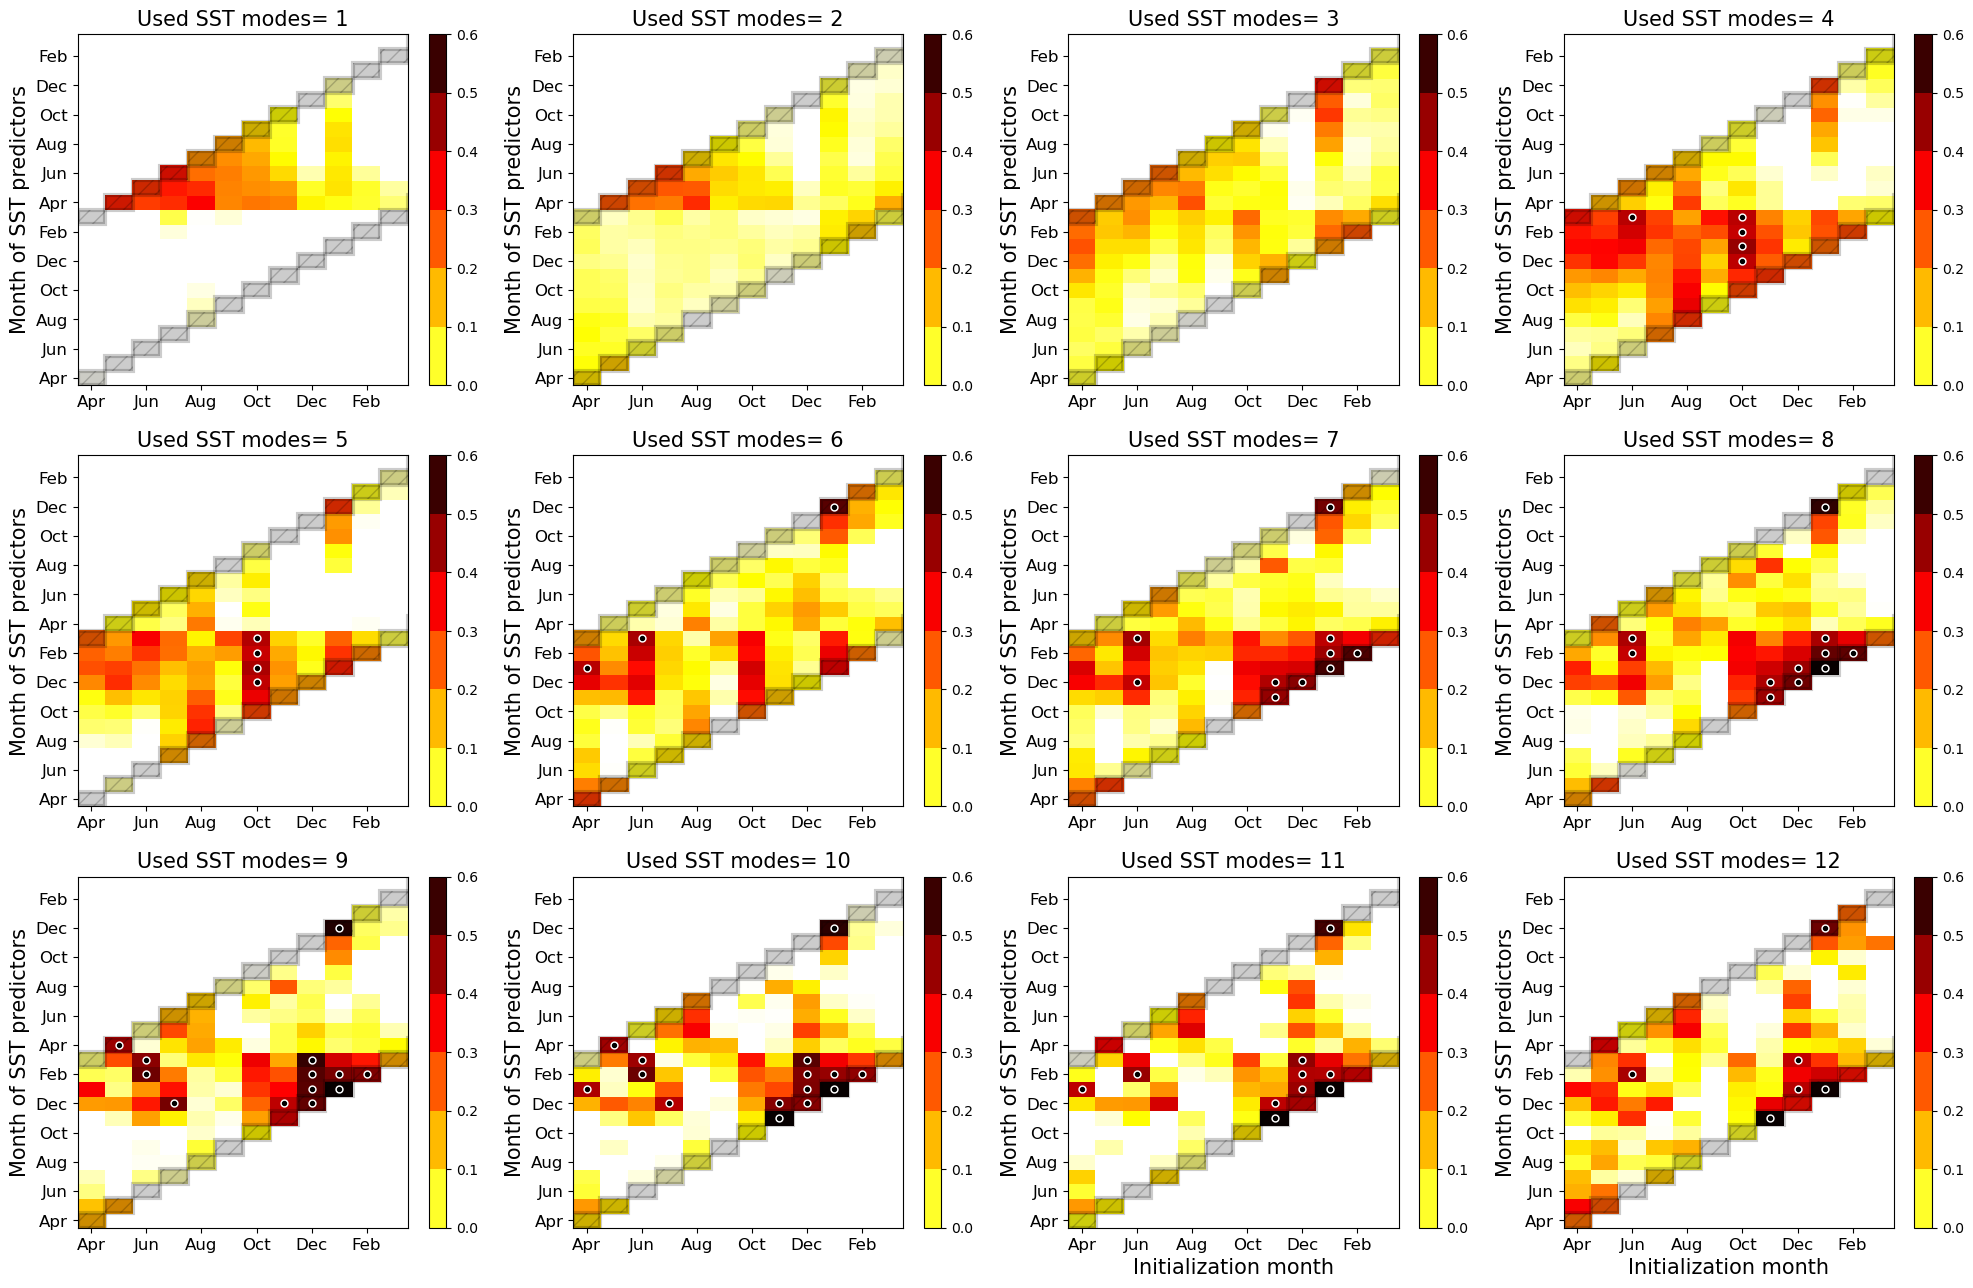

In [80]:
fig=plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    del sys.modules["Tile_plot"]
    from Tile_plot import making_tile
    making_tile                                                                        = making_tile(np.squeeze(score_map_SSTmode[i,:,:]))
    score_map_extend, max_score_SSTmode, mean_score_SSTmode, std_score, init_month     = making_tile._tile_plot_predictor_month(lead_time_label)

    print(np.max(score_map_extend))

    cs=plt.pcolor(score_map_extend,cmap=my_map,vmin=-0.1,vmax=0.6)
    cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
    plt.xticks(np.arange(0.5,17,2),('Apr','Jun','Aug','Oct',\
                            'Dec','Feb','Apr','Jun','Aug'),fontsize=12)
    plt.yticks(np.arange(0.5,24,2), ('Apr','Jun','Aug','Oct',\
                            'Dec','Feb','Apr','Jun','Aug','Oct','Dec','Feb'),fontsize=12)
    plt.xlim([0,12])
    plt.ylim([0,24])
    for j in range(0,14):
        x1 = [j,j+1,j+1,j]
        y1 = [(j)-1+1,(j)-1+1,(j)-1+2,(j)-1+2]
        plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
        x1 = [j,j+1,j+1,j]
        y1 = [(j)-1+1+11,(j)-1+1+11,(j)-1+2+11,(j)-1+2+11]
        plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
    if i<10:
      print(' 0')
    else:
      plt.xlabel('Initialization month',fontsize=15)
    plt.ylabel('Month of SST predictors',fontsize=15)
    plt.title('Used SST modes= '+str(i+1)+'',fontsize=15)
    posi_x,posi_y = np.where(score_map_extend.T>0.4)
    plt.scatter(posi_x+0.5,posi_y+0.5,25,'w')
    plt.scatter(posi_x+0.5,posi_y+0.5,8,'k')
    plt.xlim([0,12])
    plt.ylim([0,24])
fig.set_size_inches(24.5, 15.5)

In [217]:
np.shape(score_map_SSTmode)

(20, 12, 12)

# RPSS score 

/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/2353016551.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,0.24,0.04), ticks=np.arange(0,0.24,0.04))
/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/2353016551.py:42: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,0.24,0.04), ticks=np.arange(0,0.24,0.04))


nan


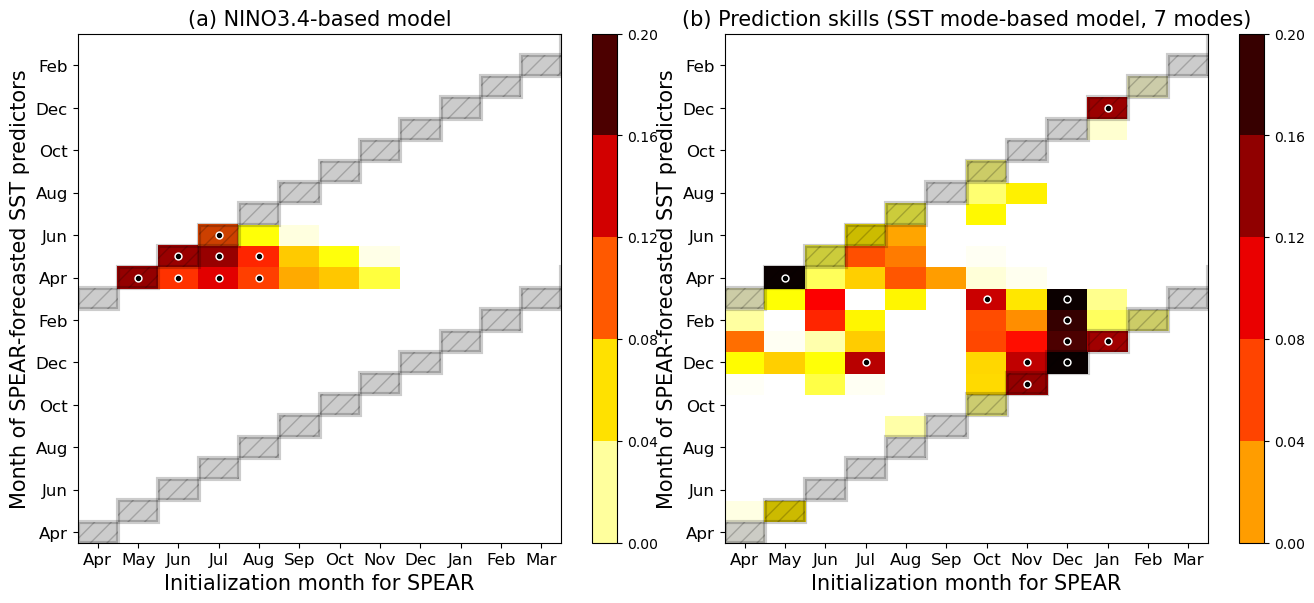

In [81]:
del sys.modules["Tile_plot"]
from Tile_plot import making_tile
making_tile                                                                       = making_tile(np.squeeze(RPSS_NINO34[:,:]))
score_map_extend, max_score_NINO34, mean_score_NINO34, std_score, init_month      = making_tile._tile_plot_predictor_month(lead_time_label)


grid   = plt.GridSpec(6, 6, wspace=0.15, hspace=1.5)

fig=plt.figure()
plt.subplot(grid[0:4, 0:2])
cs=plt.pcolor(score_map_extend,cmap=my_map,vmin=0,vmax=0.2)
cbar = plt.colorbar(cs,boundaries=np.arange(0,0.24,0.04), ticks=np.arange(0,0.24,0.04))
plt.xticks(np.arange(0.5,17,1),('Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov',\
                        'Dec','Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug'),fontsize=12)
plt.yticks(np.arange(0.5,24,2), ('Apr','Jun','Aug','Oct',\
                        'Dec','Feb','Apr','Jun','Aug','Oct','Dec','Feb'),fontsize=12)
plt.xlim([0,12])
plt.ylim([0,24])
for j in range(0,14):
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1,(j)-1+1,(j)-1+2,(j)-1+2]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1+11,(j)-1+1+11,(j)-1+2+11,(j)-1+2+11]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
plt.xlabel('Initialization month for SPEAR',fontsize=15)
plt.ylabel('Month of SPEAR-forecasted SST predictors',fontsize=15)
plt.title('(a) NINO3.4-based model',fontsize=15)
posi_x,posi_y = np.where(score_map_extend.T>0.1)
plt.scatter(posi_x+0.5,posi_y+0.5,25,'w')
plt.scatter(posi_x+0.5,posi_y+0.5,8,'k')


del sys.modules["Tile_plot"]
from Tile_plot import making_tile
making_tile                                                                        = making_tile(np.squeeze(RPSS_SSTmode[8,:,:]))
score_map_extend, max_score_SSTmode, mean_score_SSTmode, std_score, init_month     = making_tile._tile_plot_predictor_month(lead_time_label)

print(np.max(score_map_extend))
plt.subplot(grid[0:4,2:4])
cs=plt.pcolor(score_map_extend,cmap=my_map,vmin=-0.1,vmax=0.2)
cbar = plt.colorbar(cs,boundaries=np.arange(0,0.24,0.04), ticks=np.arange(0,0.24,0.04))
plt.xticks(np.arange(0.5,17,1),('Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov',\
                        'Dec','Jan','Feb','Mar','Apr','May','Jun', 'Jul','Aug'),fontsize=12)
plt.yticks(np.arange(0.5,24,2), ('Apr','Jun','Aug','Oct',\
                        'Dec','Feb','Apr','Jun','Aug','Oct','Dec','Feb'),fontsize=12)
plt.xlim([0,12])
plt.ylim([0,24])
for j in range(0,14):
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1,(j)-1+1,(j)-1+2,(j)-1+2]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1+11,(j)-1+1+11,(j)-1+2+11,(j)-1+2+11]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
plt.xlabel('Initialization month for SPEAR',fontsize=15)
plt.ylabel('Month of SPEAR-forecasted SST predictors',fontsize=15)
plt.title('(b) Prediction skills (SST mode-based model, 7 modes)',fontsize=15)
posi_x,posi_y = np.where(score_map_extend.T>0.1)
plt.scatter(posi_x+0.5,posi_y+0.5,25,'w')
plt.scatter(posi_x+0.5,posi_y+0.5,8,'k')
plt.xlim([0,12])
plt.ylim([0,24])
fig.set_size_inches(24.5, 10.5)

Current Time = 04/02/24:22:36:34
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
abcd
abcd
1


/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/1756760785.py:19: RuntimeWarning: invalid value encountered in divide
  plt.plot(scale*10,(hit[1,:,:]/pool[1,:,:]).mean(axis=1),color='black',linestyle='--',marker='o')


Text(0.5, 1.0, '(b) After Calibration')

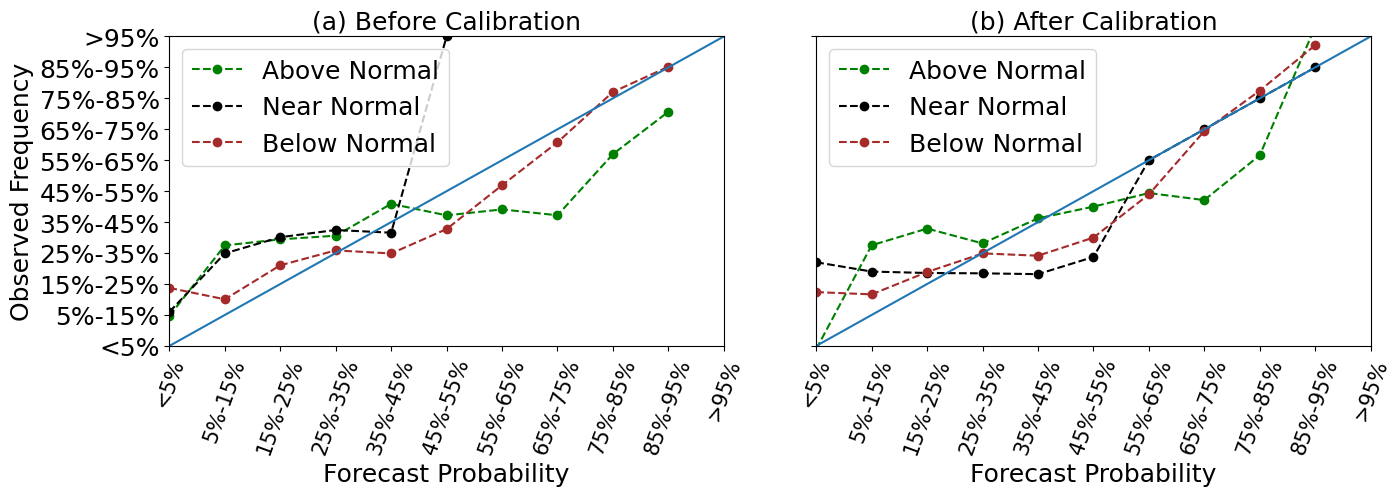

In [83]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)


hit  = hit_SSTmode
pool = pool_SSTmode
scale = scale_SSTmode

grid   = plt.GridSpec(4, 4, wspace=0.4, hspace=0.4)

fig=plt.figure()
plt.subplot(grid[0:3, 0:2])
x=['<5%','5%-15%','15%-25%','25%-35%','35%-45%','45%-55%','55%-65%','65%-75%','75%-85%','85%-95%','>95%']
x2=np.arange(0,11,1)
#plt.bar(x2,observed_frequency/sum_bin, align='center', alpha=0.5)
plt.plot(scale*10,(hit[2,:,:]/pool[2,:,:]).mean(axis=1),color='green',linestyle='--',marker='o')
plt.plot(scale*10,(hit[1,:,:]/pool[1,:,:]).mean(axis=1),color='black',linestyle='--',marker='o')
plt.plot(scale*10,(hit[0,:,:]/pool[0,:,:]).mean(axis=1),color='brown',linestyle='--',marker='o')
plt.legend(['Above Normal','Near Normal','Below Normal'],fontsize=18)
plt.ylabel('Observed Frequency',fontsize=18)
plt.xlabel('Forecast Probability',fontsize=18)
plt.xticks(x2, x,fontsize=15)
plt.yticks(x2/10, x,fontsize=18)
plt.xticks(rotation=70)
plt.xlim(0,10)
plt.ylim(0,1)
x2=np.arange(0,1.1,0.1)
plt.plot(x2*10,x2)
plt.title('(a) Before Calibration',fontsize=18)

fig.set_size_inches(15.5, 5.5)


del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
Regression_wise                          = Regression_wise(np.reshape(tornado_day_CONUS_quantile,[30,1]),np.squeeze(predict_SSTmode[6:12,:,:,:]),0,3)
#hit_SSTmode,pool_SSTmode,scale_SSTmode   = Regression_wise._attribute_diagram(threshold=0.4)
new_probaiblity                          = Regression_wise._calibration_attribute()
plt.subplot(grid[0:3, 2:4])
x2=np.arange(0,11,1)
#plt.bar(x2,observed_frequency/sum_bin, align='center', alpha=0.5)
plt.plot(scale*10,new_probaiblity[2,:,:].mean(axis=1),color='green',linestyle='--',marker='o')
plt.plot(scale*10,new_probaiblity[1,:,:].mean(axis=1),color='black',linestyle='--',marker='o')
plt.plot(scale*10,new_probaiblity[0,:,:].mean(axis=1),color='brown',linestyle='--',marker='o')
plt.legend(['Above Normal','Near Normal','Below Normal'],fontsize=18)
#plt.plot(x2,observed_frequency[:,1]/sum_bin[:,1]-0.15,color='brown',linestyle='--',marker='o')
#plt.ylabel('Observed Frequency')
plt.xlabel('Forecast Probability',fontsize=18)
plt.xticks(x2, x,fontsize=15)
x=['','','','','','','','','','','']
plt.yticks(x2, x,fontsize=15)
plt.xticks(rotation=70)
plt.xlim(0,10)
plt.ylim(0,1)
x2=np.arange(0,1.1,0.1)
plt.plot(x2*10,x2)
fig.set_size_inches(15.5, 5.5)
plt.title('(b) After Calibration',fontsize=18)

# FIG3 (find the most predictable pattern)

In [240]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)


from statsmodels.distributions.empirical_distribution import ECDF
tornado_month                    = np.reshape(tornado_month,[30,int(np.size(tornado_month)/30)])
tornado_day_CONUS_monthly_region = np.zeros(np.shape(tornado_month))

#tornado_day_CONUS_monthly_region = np.zeros(np.shape(tornado_month_region))

# convert tornado number to an empirical function
for region in range(tornado_month.shape[1]):
    ecdf                                       = ECDF(tornado_month[:,region])
    tornado_day_CONUS_monthly_region[:,region] = ecdf(tornado_month[:,region])

import sys
del sys.modules["Tornado_forecast_model"]
from Tornado_forecast_model import tornado_model
tornado_model                         = tornado_model(tornado_data = tornado_day_CONUS_monthly_region, predictor = pcs_obs_sst, init_year = 1992)
predict_SSTmode_map,coef_SSTmode_map,tornado_percentile_map,tornado_percentile_min  = tornado_model._forecast(normalize=False)

Current Time = 04/03/24:19:41:33
working on mode = 1
working on mode = 2
working on mode = 3
working on mode = 4
working on mode = 5
working on mode = 6
working on mode = 7
working on mode = 8
working on mode = 9
working on mode = 10
working on mode = 11
working on mode = 12
working on mode = 13
working on mode = 14
working on mode = 15
working on mode = 16
working on mode = 17
working on mode = 18
working on mode = 19
working on mode = 20


In [306]:
np.shape(tornado_month)

(30, 1403)

In [86]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

from import_data import tornado_data
data                                     = tornado_data(start_year = 1992, end_year = 2017,colab=False)
lon, lat                                 = data._lat_lon(tornado=True)
# load land sea mask
land_sea_mask                            = data._data_landsea_mask(mask_type=[False,True,False])

Current Time = 04/02/24:22:46:11
type 1 = sst, type 2 = tornado, type 3 = atmosphere, input example = [True,False,False]


In [245]:
init_month    = 0
target_month  = 0

del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1992, end_year = 2017,colab=False)
lon, lat                                 = data._lat_lon(tornado=True)

from sklearn.decomposition import PCA
pca           = PCA()
pcs           = np.zeros((20,30,20))                                  # 20 tornado modes, 30 timesteps, 20 sst mode as predictors
EOF_tornado   = np.zeros((20,np.size(lat[0,:])*np.size(lon[:,0]),20)) # 20 tornado modes and lat*lon, and 20 sst modes as predictors
variance      = np.zeros((20,30))

for used_sst_mode in np.arange(0,20):
    pca.fit(predict_SSTmode_map[used_sst_mode,init_month,target_month,:,:]*np.reshape(land_sea_mask,[1,23*61]))
    variance[used_sst_mode,:]      = pca.explained_variance_
    for i in range(20):
        pcs[i,:,used_sst_mode]     = np.dot(predict_SSTmode_map[used_sst_mode,init_month,target_month,:,:] ,pca.components_[i,:])
        std                        = np.std(pcs[i,:,used_sst_mode])
        pcs[i,:,used_sst_mode]     = pcs[i,:,used_sst_mode]/std
        EOF_tornado[i,:,used_sst_mode]  = pca.components_[i,:]*std

del sys.modules["import_data"]
from import_data import tornado_data
data                                                                         = tornado_data(start_year = 1995, end_year = 2017,colab=False)
pcs_atm, EOF_obs_combine, IVTu_regression, IVTv_regression, z925_regression  = data._ats()

In [89]:
import matplotlib.colors as colors
# Example of making your own norm.  Also see matplotlib.colors.
# From Joe Kington: This one gives two different linear ramps:

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
#####

input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression


/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/functio

[[1.         0.67194604]
 [0.67194604 1.        ]]
[[1.        0.4310973]
 [0.4310973 1.       ]]


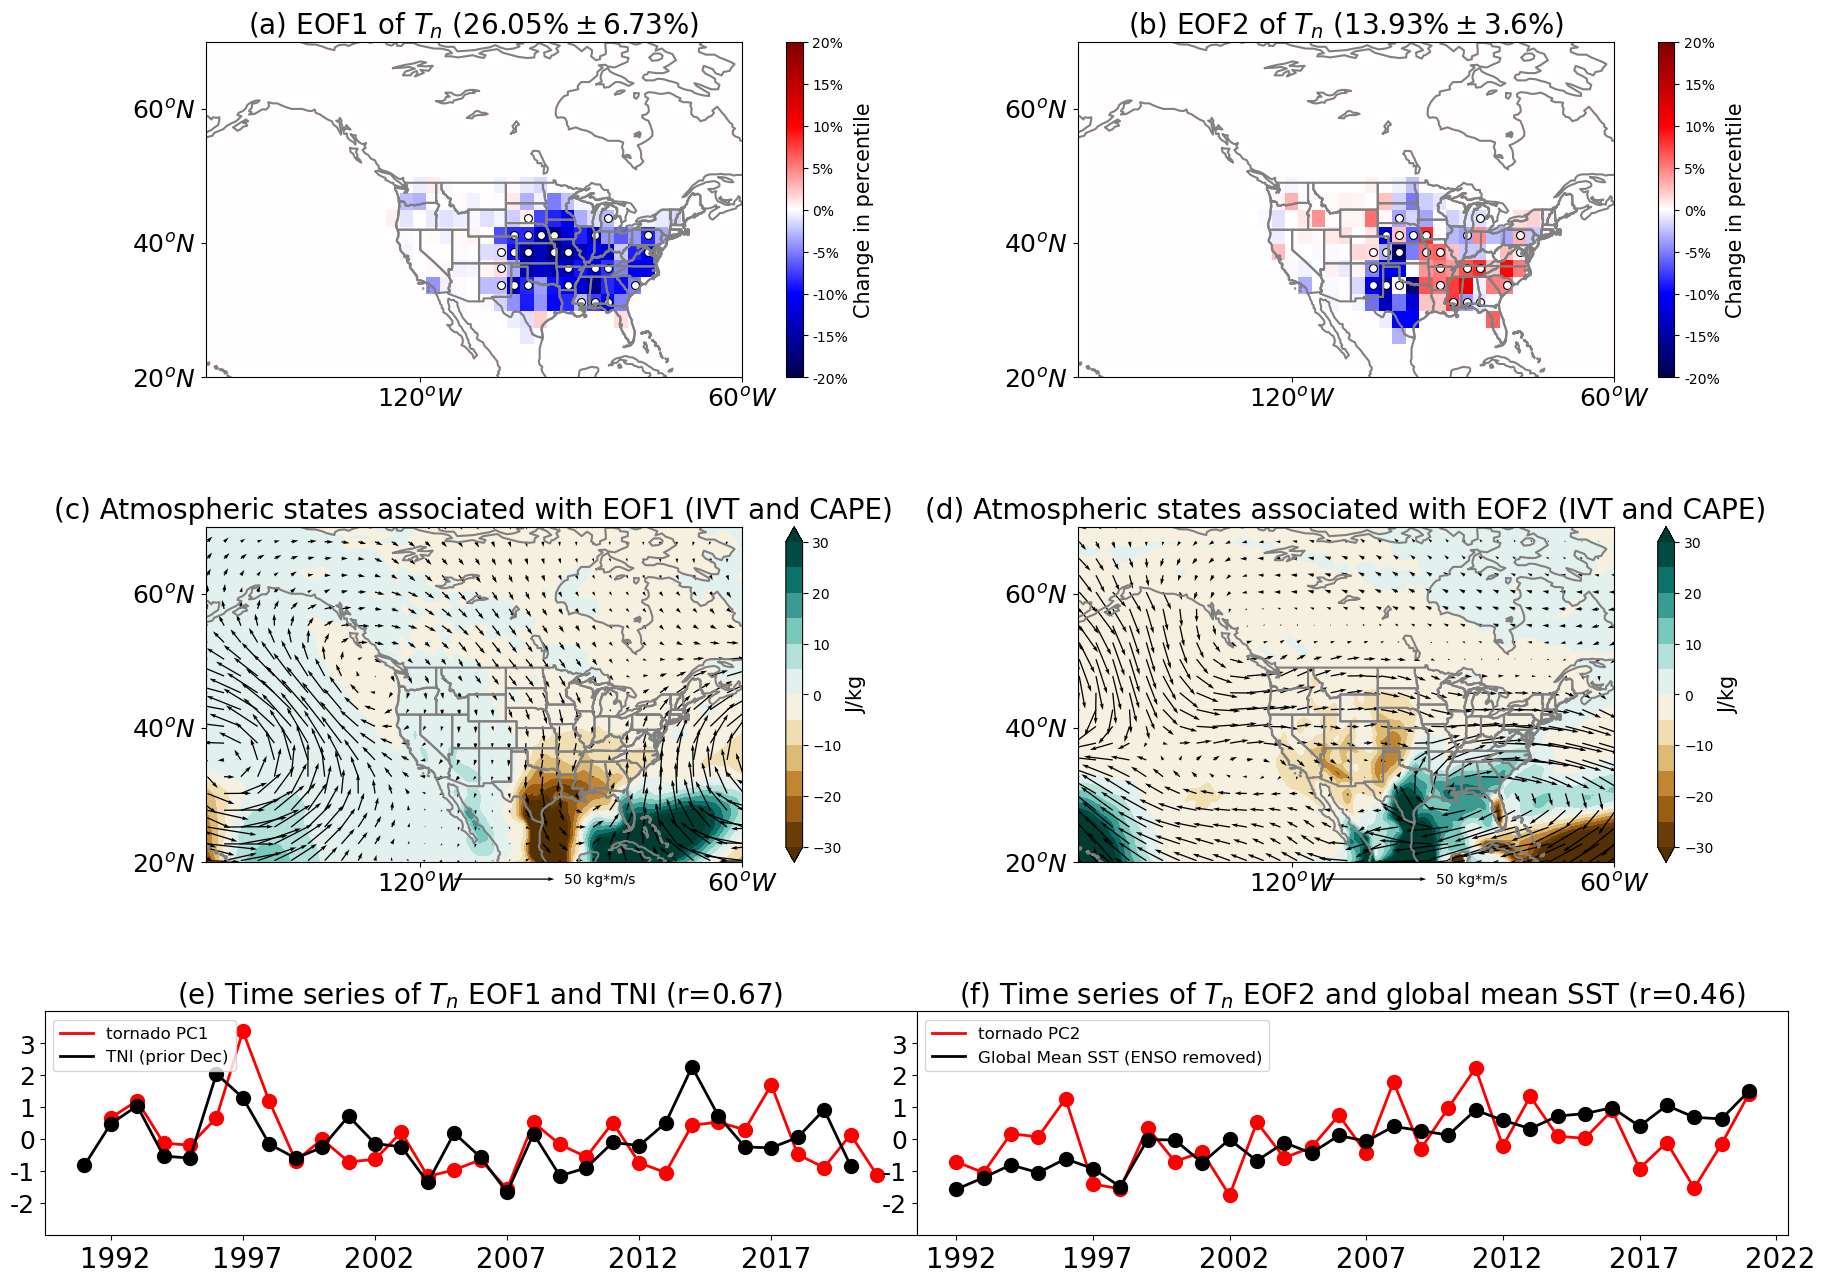

In [193]:
from matplotlib import gridspec
fig = plt.figure()

# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)

# set width of each subplot as 8
fig.set_figwidth(8)

spec = gridspec.GridSpec(ncols=2, nrows=3,
                         width_ratios=[1, 1], wspace=0.0,
                         hspace=0.5, height_ratios=[3, 3, 2])
del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1992, end_year = 2017,colab=False)
lon, lat                                 = data._lat_lon(tornado=True)


tornado_mode  = 0
used_sst_mode = 8

reconstruct = pcs[0:8,:,used_sst_mode].T.dot(EOF_tornado[0:8,:,used_sst_mode]) #predict tornado mode,
del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
Regression_wise                          = Regression_wise(tornado_day_CONUS_monthly_region,reconstruct,0,0)
score_map_region                         = Regression_wise._corrcoef()
score_map_region2                        = np.reshape(np.diag(score_map_region),[23,61])
# del sys.modules["Regression_wise"]
# from Regression_wise import Regression_wise
# Regression_wise                                                                 = Regression_wise(tornado_day_CONUS_monthly_region,reconstruct,0,0)
# RPSS_SSTmode_region,obs_category_SSTmode_region, model_category_SSTmode_region  = Regression_wise._RPSS(calculate_pattern=True)
# RPSS_SSTmode_region                      = np.reshape(np.diag(RPSS_SSTmode_region),[23,61])

tornado_climate = np.reshape(np.mean(tornado_month,axis=0),[23,61])
amp_mask  = np.ones(np.shape(tornado_climate))
amp_mask[tornado_climate<1.5] = 0
posi_x, posi_y = np.where( (tornado_climate>1.5) & ((score_map_region2)>=0.3))
#posi_x, posi_y                           = np.where((score_map_region2*land_sea_mask>=0.4) & (np.abs(np.reshape(EOF_tornado[0,:,8],[np.size(lat[:,0]),np.size(lon[0,:])]))>0.005) \
#                                                    )

ax0      = fig.add_subplot(spec[0])
states.boundary.plot(color='gray',ax=ax0)
cs0      = ax0.pcolor(lon-360,lat+1.25,np.reshape(EOF_tornado[tornado_mode,:,used_sst_mode],[np.size(lat[:,0]),np.size(lon[0,:])]),vmin=-0.2,vmax=0.2,cmap='seismic')
ax0.scatter(lon[0,posi_y]-360,lat[posi_x,0]+1.25,30,'k','o')
ax0.scatter(lon[0,posi_y]-360,lat[posi_x,0]+1.25,15,'w','o')
ax0.plot(costal_lon-360,costal_lat,'gray')
ax0.set_xticks([0-360, 60-360, 120-360, 180-360,240-360,300-360,360-360], minor=False)
ax0.set_xticklabels(['$0^oE$', '$60^oE$','$120^oE$', '$180^oE$', '$120^oW$', '$60^oW$', '$0^oW$'], fontdict=None, minor=False,fontsize=18)
ax0.set_yticks([-80,-60,-40,-20,0, 20,40,60,80], minor=False)
ax0.set_yticklabels(['$80^oS$', '$60^oS$', '$40^oS$', '$20^oS$', '$Eq$', '$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'], fontdict=None, minor=False,fontsize=18)
ax0.set_xlim([200-360,300-360])
ax0.set_ylim([20,70])
var  = round(variance[used_sst_mode,0]/np.sum(variance[used_sst_mode,:])*100,2)
dvar = round(variance[used_sst_mode,0]/np.sum(variance[used_sst_mode,:])*(2/30)**(1/2)*100,2)
ax0.set_title(r'(a) EOF1 of $T_n$ ('+str(var)+'$\%\pm$'+str(dvar)+'$\%$)',fontsize=20)
cbar0 = plt.colorbar(cs0)
cbar0.ax.set_yticklabels(['-20%','-15%','-10%','-5%','0%','5%','10%','15%','20%'])
cbar0.set_label('Change in percentile', rotation=90,fontsize=15)


tornado_mode  = 1
used_sst_mode = 8
ax1      = fig.add_subplot(spec[1])
states.boundary.plot(color='gray',ax=ax1)
cs1     = ax1.pcolor(lon-360,lat+1.25,np.reshape(EOF_tornado[tornado_mode,:,used_sst_mode],[np.size(lat[:,0]),np.size(lon[0,:])]),vmin=-0.2,vmax=0.2,cmap='seismic')
ax1.scatter(lon[0,posi_y]-360,lat[posi_x,0]+1.25,30,'k','o')
ax1.scatter(lon[0,posi_y]-360,lat[posi_x,0]+1.25,15,'w','o')
ax1.plot(costal_lon-360,costal_lat,'gray')
ax1.set_xticks([0-360, 60-360, 120-360, 180-360,240-360,300-360,360-360], minor=False)
ax1.set_xticklabels(['$0^oE$', '$60^oE$','$120^oE$', '$180^oE$', '$120^oW$', '$60^oW$', '$0^oW$'], fontdict=None, minor=False,fontsize=18)
ax1.set_yticks([-80,-60,-40,-20,0, 20,40,60,80], minor=False)
ax1.set_yticklabels(['$80^oS$', '$60^oS$', '$40^oS$', '$20^oS$', '$Eq$', '$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'], fontdict=None, minor=False,fontsize=18)
ax1.set_xlim([200-360,300-360])
ax1.set_ylim([20,70])
var  = round(variance[used_sst_mode,1]/np.sum(variance[used_sst_mode,:])*100,2)
dvar = round(variance[used_sst_mode,1]/np.sum(variance[used_sst_mode,:])*(2/30)**(1/2)*100,2)
ax1.set_title(r'(b) EOF2 of $T_n$ ('+str(var)+'$\%\pm$'+str(dvar)+'$\%$)',fontsize=20)
cbar1=plt.colorbar(cs1)
cbar1.ax.set_yticklabels(['-20%','-15%','-10%','-5%','0%','5%','10%','15%','20%'])
cbar1.set_label('Change in percentile', rotation=90,fontsize=15)







########### using forecast tornado timeseries to find the corresponding atmospheric states
ats_mode            = 8
X                   = np.reshape(pcs[0,1:,8],[1,29])         # tornado PCs as predictor
X                   = (X-np.mean(X))/np.std(X)
Y                   = pcs_atm[:ats_mode,0,1:,:].mean(axis=2) # atmospheric states as predictant
coef                = np.linalg.inv(X.dot(X.T)).dot(X.dot(Y.T))
EOF_tornado_to_atm  = np.reshape(np.reshape(coef,[1,ats_mode]).dot(np.reshape(EOF_obs_combine[:ats_mode,:,:,:],[ats_mode,3*130*520])),[3,130,520])
EOF_tornado_to_atm_z925 = np.reshape(np.reshape(coef,[1,ats_mode]).dot(z925_regression[:ats_mode,:]),[130,520])
IVTu_regression     = np.reshape(IVTu_regression,[20,360*576])
IVTv_regression     = np.reshape(IVTv_regression,[20,360*576])
EOF_ivtu            = np.reshape(np.reshape(coef,[1,ats_mode]).dot(IVTu_regression[:ats_mode,:]),[360,576])
EOF_ivtv            = np.reshape(np.reshape(coef,[1,ats_mode]).dot(IVTv_regression[:ats_mode,:]),[360,576])

del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1992, end_year = 2017,colab=False)
lon, lat                                 = data._lat_lon(atmosphere=True)

ax2      = fig.add_subplot(spec[2])
states.boundary.plot(color='gray',ax=ax2)
ax2.plot(costal_lon-360,costal_lat,'gray')
ax2.plot(costal_lon,costal_lat,'gray')
cs2=ax2.contourf(lon-360,lat,EOF_tornado_to_atm[2,:,:]*5,np.arange(-30,35,5),cmap='BrBG', norm=MidpointNormalize(midpoint=0),extend='both')
lon, lat                                 = data._lat_lon(IVT=True)
q_r=ax2.quiver(lon[::5,::5]-360,lat[::5,::5],EOF_ivtu[::5,::5]*5, EOF_ivtv[::5,::5]*5, scale=50, scale_units='inches')
lkey=50
ax2.quiverkey(q_r, X=0.65, Y=-0.05, U=lkey,
             label=''+str(lkey)+' kg*m/s', labelpos='E')
ax2.set_xticks([0-360, 60-360, 120-360, 180-360,240-360,300-360,360-360], minor=False)
ax2.set_xticklabels(['$0^oE$', '$60^oE$','$120^oE$', '$180^oE$', '$120^oW$', '$60^oW$', '$0^oW$'], fontdict=None, minor=False,fontsize=18)
ax2.set_yticks([-80,-60,-40,-20,0, 20,40,60,80], minor=False)
ax2.set_yticklabels(['$80^oS$', '$60^oS$', '$40^oS$', '$20^oS$', '$Eq$', '$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'], fontdict=None, minor=False,fontsize=18)
ax2.set_xlim([200-360,300-360])
ax2.set_ylim([20,70])
cbar2 = plt.colorbar(cs2)
cbar2.set_label('J/kg', rotation=90,fontsize=15)
ax2.set_title('(c) Atmospheric states associated with EOF1 (IVT and CAPE)',fontsize=20)

ats_mode            = 8
X                   = np.reshape(pcs[1,1:,8],[1,29])         # tornado PCs as predictor
X                   = (X-np.mean(X))/np.std(X)
Y                   = pcs_atm[:ats_mode,0,1:,:].mean(axis=2) # atmospheric states as predictant
coef                = np.linalg.inv(X.dot(X.T)).dot(X.dot(Y.T))
EOF_tornado_to_atm  = np.reshape(np.reshape(coef,[1,ats_mode]).dot(np.reshape(EOF_obs_combine[:ats_mode,:,:,:],[ats_mode,3*130*520])),[3,130,520])
EOF_tornado_to_atm_z925 = np.reshape(np.reshape(coef,[1,ats_mode]).dot(z925_regression[:ats_mode,:]),[130,520])
IVTu_regression     = np.reshape(IVTu_regression,[20,360*576])
IVTv_regression     = np.reshape(IVTv_regression,[20,360*576])
EOF_ivtu            = np.reshape(np.reshape(coef,[1,ats_mode]).dot(IVTu_regression[:ats_mode,:]),[360,576])
EOF_ivtv            = np.reshape(np.reshape(coef,[1,ats_mode]).dot(IVTv_regression[:ats_mode,:]),[360,576])

del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1992, end_year = 2017,colab=False)
lon, lat                                 = data._lat_lon(atmosphere=True)


ax3      = fig.add_subplot(spec[3])
states.boundary.plot(color='gray',ax=ax3)
ax3.plot(costal_lon-360,costal_lat,'gray')
ax3.plot(costal_lon,costal_lat,'gray')
cs3=ax3.contourf(lon-360,lat,EOF_tornado_to_atm[2,:,:]*5,np.arange(-30,35,5),cmap='BrBG', norm=MidpointNormalize(midpoint=0),extend='both')
lon, lat                                 = data._lat_lon(IVT=True)
q_r=ax3.quiver(lon[::5,::5]-360,lat[::5,::5],EOF_ivtu[::5,::5]*5, EOF_ivtv[::5,::5]*5, scale=50, scale_units='inches')
lkey=50
ax3.quiverkey(q_r, X=0.65, Y=-0.05, U=lkey,
             label=''+str(lkey)+' kg*m/s', labelpos='E')

ax3.set_xticks([0-360, 60-360, 120-360, 180-360,240-360,300-360,360-360], minor=False)
ax3.set_xticklabels(['$0^oE$', '$60^oE$','$120^oE$', '$180^oE$', '$120^oW$', '$60^oW$', '$0^oW$'], fontdict=None, minor=False,fontsize=18)
ax3.set_yticks([-80,-60,-40,-20,0, 20,40,60,80], minor=False)
ax3.set_yticklabels(['$80^oS$', '$60^oS$', '$40^oS$', '$20^oS$', '$Eq$', '$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'], fontdict=None, minor=False,fontsize=18)
ax3.set_xlim([200-360,300-360])
ax3.set_ylim([20,70])
cbar3 = plt.colorbar(cs3)
cbar3.set_label('J/kg', rotation=90,fontsize=15)
ax3.set_title('(d) Atmospheric states associated with EOF2 (IVT and CAPE)',fontsize=20)


ax4      = fig.add_subplot(spec[4])
series1  = (pcs[0,:,8]-np.mean(pcs[0,0:,8]))/np.std(pcs[0,:,8])
series2  = pcs[0,:,0]
series3  = np.reshape(pcs_obs_sst,[20,12,30,12])
series2  = series3[2,11,:,11]
print(np.corrcoef(series1[:-13],series2[1:30-12]))
#ax4.plot(np.arange(1992,2022),series1,label='tornado PC1')
#ax4.plot(np.arange(1992,2022)-1,series2,label='NINO3.4 (prior Dec)')
ax4.plot(np.arange(1992,2022),series1,'r-',linewidth=2,label='tornado PC1')
ax4.plot(np.arange(1992,2022),series1,'r.',markersize=20)
ax4.plot(np.arange(1992,2022)-1,series2,'k-',linewidth=2,label='TNI (prior Dec)')
ax4.plot(np.arange(1992,2022)-1,series2,'k.',markersize=20)
ax4.set_ylim([-3,4])
ax4.set_xticks(np.arange(1992,2022,5))
ax4.set_xticklabels([' 1992',  ' 1997', \
                              ' 2002',  ' 2007',\
                              ' 2012',  ' 2017',\
                              ],fontsize=20)

ax4.legend(fontsize=12,loc='upper left')
ax4.set_yticks([-2,-1,0,1,2,3], ['-2', '-1', '0', '1', '2', '3'],minor=False,fontsize=15)
ax4.set_yticklabels(['-2', '-1', '0', '1', '2', '3'], fontdict=None, minor=False,fontsize=18)
ax4.set_title(r'(e) Time series of $T_n$ EOF1 and TNI (r=0.67)',fontsize=20)


series   = np.reshape(pcs_obs_sst,[20,12,30,12])
series   = series[1,0,:,0]
ax5      = fig.add_subplot(spec[5])
ax5.plot(np.arange(1992,2022),(pcs[1,:,7]-np.mean(pcs[1,0:,7]))/np.std(pcs[1,:,7]),'r-',linewidth=2,label='tornado PC2')
ax5.plot(np.arange(1992,2022),(pcs[1,:,7]-np.mean(pcs[1,0:,7]))/np.std(pcs[1,:,7]),'r.',markersize=20)
ax5.plot(np.arange(1992,2022),series,'k-',linewidth=2,label='Global Mean SST (ENSO removed)')
ax5.plot(np.arange(1992,2022),series,'k.',markersize=20)
ax5.set_xticks(np.arange(1992,2023,5))
ax5.set_xticklabels([' 1992',  ' 1997', \
                              ' 2002',  ' 2007',\
                              ' 2012',  ' 2017',\
                              ' 2022'],fontsize=20)
ax5.legend(fontsize=12,loc='upper left')
ax5.set_yticks([-2,-1,0,1,2,3], ['-2', '-1', '0', '1', '2', '3'],minor=False,fontsize=15)
ax5.set_yticklabels(['-2', '-1', '0', '1', '2', '3'], fontdict=None, minor=False,fontsize=18)
ax5.set_title(r'(f) Time series of $T_n$ EOF2 and global mean SST (r=0.46)',fontsize=20)
ax5.set_ylim([-3,4])
print(np.corrcoef((pcs[1,:-11,7]-np.mean(pcs[1,:-11,7]))/np.std(pcs[1,:-11,7]),series[0:-11]))
fig.set_size_inches(22.5,15.5)

[[1.         0.67194604]
 [0.67194604 1.        ]]


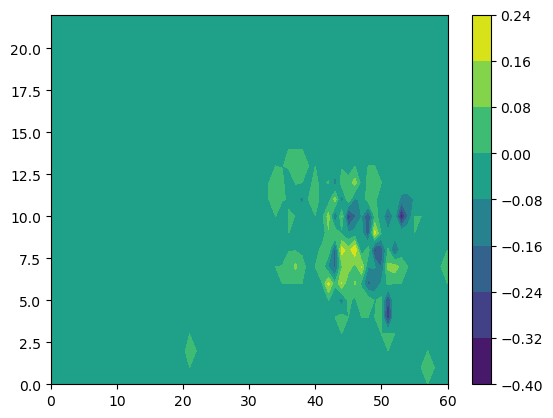

In [114]:
# project observation onto tornado EOF1 and EOF2 

plt.figure()
cs=plt.contourf(np.reshape(predict_SSTmode_map[used_sst_mode,init_month,target_month,29,:],[23,61]))
plt.colorbar(cs)
print(np.corrcoef(series1[:-13],series2[1:30-12]))

(30, 1403)
[[1.         0.52173971]
 [0.52173971 1.        ]]


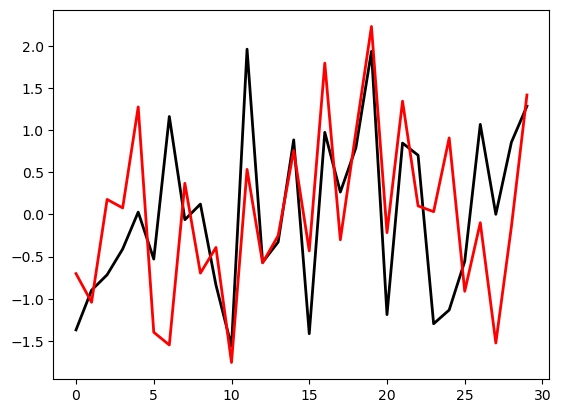

In [203]:


series1  = (pcs[1,:,7]-np.mean(pcs[1,0:,7]))/np.std(pcs[1,:,7])

print(np.shape(tornado_percentile_map))
series = (tornado_percentile_map*np.reshape(land_sea_mask,[1,23*61])).dot(EOF_tornado[1,:,7])
series = (series-np.mean(series))/np.std(series)
plt.plot(series, 'k-',linewidth=2,label='raw data projection')
plt.plot(series1,'r-',linewidth=2,label='tornado PC2')
print(np.corrcoef(series,series1))


(30, 1403)


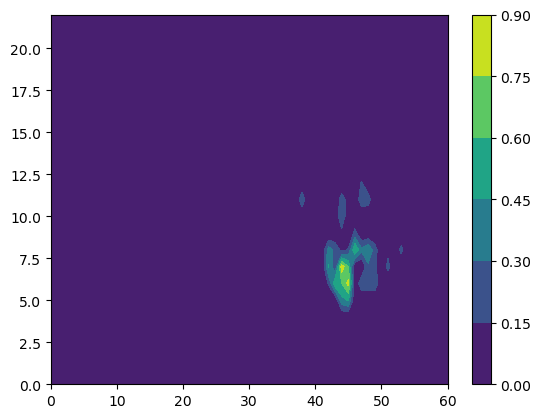

In [182]:
plt.figure()
cs=plt.contourf(np.reshape(tornado_percentile_map[2,:],[23,61])*land_sea_mask)
plt.colorbar(cs)
print(np.shape(tornado_percentile_map*np.reshape(land_sea_mask,[1,23*61])))

In [340]:
EOF1_scores         = np.zeros((12,12))
EOF2_scores         = np.zeros((12,12))
target_month_table  = np.zeros((12,12))
init_month_table    = np.zeros((12,12))

for init_month in range(12):
    for target_month  in range(12):

        del sys.modules["import_data"]
        from import_data import tornado_data
        data                                     = tornado_data(start_year = 1992, end_year = 2017,colab=False)
        lon, lat                                 = data._lat_lon(tornado=True)
        
        from sklearn.decomposition import PCA
        pca           = PCA()
        pcs           = np.zeros((20,30,20))                                  # 20 tornado modes, 30 timesteps, 20 sst mode as predictors
        EOF_tornado   = np.zeros((20,np.size(lat[0,:])*np.size(lon[:,0]),20)) # 20 tornado modes and lat*lon, and 20 sst modes as predictors
        variance      = np.zeros((20,30))
        
        for used_sst_mode in np.arange(0,20):
            pca.fit(predict_SSTmode_map[used_sst_mode,init_month,target_month,:,:]*np.reshape(land_sea_mask,[1,23*61]))
            variance[used_sst_mode,:]      = pca.explained_variance_
            for i in range(20):
                pcs[i,:,used_sst_mode]     = np.dot(predict_SSTmode_map[used_sst_mode,init_month,target_month,:,:] ,pca.components_[i,:])
                std                        = np.std(pcs[i,:,used_sst_mode])
                pcs[i,:,used_sst_mode]     = pcs[i,:,used_sst_mode]/std
                EOF_tornado[i,:,used_sst_mode]  = pca.components_[i,:]*std

        series1  = (pcs[1,:,8]-np.mean(pcs[1,0:,8]))/np.std(pcs[1,:,8])

        #print(np.shape(tornado_percentile_map))
        series = (tornado_percentile_map*np.reshape(land_sea_mask,[1,23*61])).dot(EOF_tornado[1,:,8])
        series = (series-np.mean(series))/np.std(series)
        EOF2_scores[init_month,target_month]=np.corrcoef(series,series1)[0][1]


        series1  = (pcs[0,:,8]-np.mean(pcs[0,0:,8]))/np.std(pcs[0,:,8])
        series = (tornado_percentile_map*np.reshape(land_sea_mask,[1,23*61])).dot(EOF_tornado[0,:,8])
        series = (series-np.mean(series))/np.std(series)
        EOF1_scores[init_month,target_month]=np.corrcoef(series[:-1],series1[1:])[0][1]
        target_month_table[init_month,target_month] = target_month
        init_month_table[init_month,target_month]   = init_month

/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/3142761446.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,1.1,0.1), ticks=np.arange(0,1.1,0.1))


(0.0, 24.0)

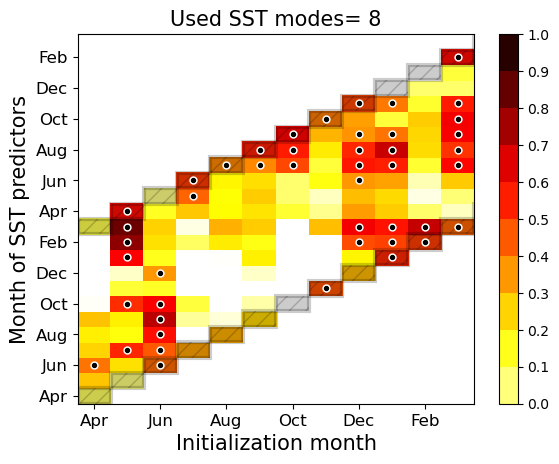

In [345]:
del sys.modules["Tile_plot"]
from Tile_plot import making_tile
making_tile                                                                                = making_tile(np.squeeze(EOF2_scores))
score_map_extend, max_score_tornadomode, mean_score_tornadomode, std_score, init_month     = making_tile._tile_plot_predictor_month(lead_time_label)


# plt.figure()
# cs=plt.contourf(init_month_table,target_month_table,EOF2_scores)
# plt.colorbar(cs)

cs=plt.pcolor(score_map_extend,cmap=my_map,vmin=-0.1,vmax=1)
cbar = plt.colorbar(cs,boundaries=np.arange(0,1.1,0.1), ticks=np.arange(0,1.1,0.1))
plt.xticks(np.arange(0.5,17,2),('Apr','Jun','Aug','Oct',\
                        'Dec','Feb','Apr','Jun','Aug'),fontsize=12)
plt.yticks(np.arange(0.5,24,2), ('Apr','Jun','Aug','Oct',\
                        'Dec','Feb','Apr','Jun','Aug','Oct','Dec','Feb'),fontsize=12)
plt.xlim([0,12])
plt.ylim([0,24])
for j in range(0,14):
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1,(j)-1+1,(j)-1+2,(j)-1+2]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1+11,(j)-1+1+11,(j)-1+2+11,(j)-1+2+11]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
if i<10:
  print(' 0')
else:
  plt.xlabel('Initialization month',fontsize=15)
plt.ylabel('Month of SST predictors',fontsize=15)
plt.title('Used SST modes= '+str(8)+'',fontsize=15)
posi_x,posi_y = np.where(score_map_extend.T>0.349)
plt.scatter(posi_x+0.5,posi_y+0.5,25,'w')
plt.scatter(posi_x+0.5,posi_y+0.5,8,'k')
plt.xlim([0,12])
plt.ylim([0,24])

In [328]:
predict_SSTmode
score_tornado_actual_day = np.zeros((12,12))
forecast_tornado_number = np.zeros((20,12,12,30))
for number_of_sst_mode in [8]:
    for init_month in range(12):
        for target_month in range(12):
            for year in range(30):
                n    = len(tornado_day_CONUS_monthly)
                sort = sorted(tornado_day_CONUS_monthly)
                # back to actual tornado number 
                percentile = predict_SSTmode[8,init_month,target_month,year,0]
                if percentile > 1:
                    percentile =0.94
                forecast_tornado_number[number_of_sst_mode,init_month,target_month,year] = sort[int(n *percentile)]
            score_tornado_actual_day[init_month,target_month]=np.corrcoef(forecast_tornado_number[number_of_sst_mode,init_month,target_month,:],tornado_day_CONUS_monthly.T)[0][1]
                


# del sys.modules["Regression_wise"]
# from Regression_wise import Regression_wise
# Regression_wise                          = Regression_wise(np.reshape(tornado_day_CONUS_quantile,[30,1]),np.squeeze(predict_SSTmode),0,3)
# score_map_SSTmode                        = Regression_wise._corrcoef()


/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/1863301954.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecast_tornado_number[number_of_sst_mode,init_month,target_month,year] = sort[int(n *percentile)]


In [311]:
predict_SSTmode[8,0,0,:,0]

array([ 0.14675656, -0.13348856,  0.33685324,  0.23706393,  0.33213757,
        0.14070967,  0.81651075,  0.66952426,  0.24483814,  0.48226158,
        0.76119308,  0.48041975,  0.53862002,  0.45711734,  0.68721916,
        0.81981406,  0.57162187,  0.2708624 ,  0.58084856,  0.84299127,
        0.46643902,  0.43739579,  0.14328277,  0.42612119,  0.85833298,
        0.22026146,  0.54316769,  0.69938039,  0.19299868,  0.94689573])

array([[1.        , 0.17132854],
       [0.17132854, 1.        ]])

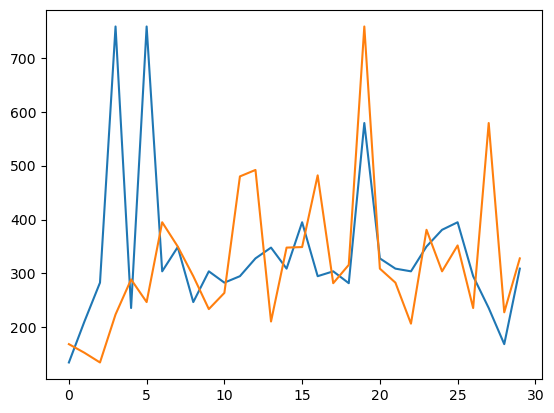

In [327]:
plt.plot(forecast_tornado_number[8,11,11,:])
plt.plot(tornado_day_CONUS_monthly)
np.corrcoef(tornado_day_CONUS_monthly.T,forecast_tornado_number[8,11,11,:])

/var/folders/x1/nb2x5h5j08b2xx8xkc64r43m0000gn/T/ipykernel_66408/1750436.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))


(0.0, 24.0)

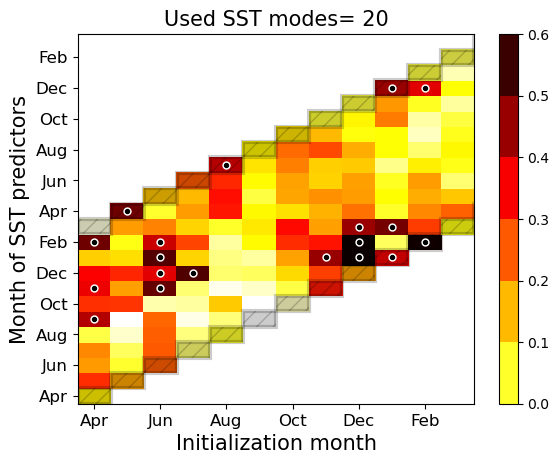

In [331]:
del sys.modules["Tile_plot"]
from Tile_plot import making_tile
making_tile                                                                                = making_tile(np.squeeze(score_tornado_actual_day))
score_map_extend, max_score_tornadomode, mean_score_tornadomode, std_score, init_month     = making_tile._tile_plot_predictor_month(lead_time_label)


# plt.figure()
# cs=plt.contourf(init_month_table,target_month_table,EOF2_scores)
# plt.colorbar(cs)

cs=plt.pcolor(score_map_extend,cmap=my_map,vmin=-0.1,vmax=0.6)
cbar = plt.colorbar(cs,boundaries=np.arange(0,0.7,0.1), ticks=np.arange(0,0.7,0.1))
plt.xticks(np.arange(0.5,17,2),('Apr','Jun','Aug','Oct',\
                        'Dec','Feb','Apr','Jun','Aug'),fontsize=12)
plt.yticks(np.arange(0.5,24,2), ('Apr','Jun','Aug','Oct',\
                        'Dec','Feb','Apr','Jun','Aug','Oct','Dec','Feb'),fontsize=12)
plt.xlim([0,12])
plt.ylim([0,24])
for j in range(0,14):
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1,(j)-1+1,(j)-1+2,(j)-1+2]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
    x1 = [j,j+1,j+1,j]
    y1 = [(j)-1+1+11,(j)-1+1+11,(j)-1+2+11,(j)-1+2+11]
    plt.fill(x1,y1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
if i<10:
  print(' 0')
else:
  plt.xlabel('Initialization month',fontsize=15)
plt.ylabel('Month of SST predictors',fontsize=15)
plt.title('Used SST modes= '+str(i+1)+'',fontsize=15)
posi_x,posi_y = np.where(score_map_extend.T>0.349)
plt.scatter(posi_x+0.5,posi_y+0.5,25,'w')
plt.scatter(posi_x+0.5,posi_y+0.5,8,'k')
plt.xlim([0,12])
plt.ylim([0,24])